# MLP Car Price Prediction

## By: Mustafa Yildirim

Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense
import kagglehub
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Downloading the dataset

In [2]:
path = kagglehub.dataset_download("vijayaadithyanvg/car-price-predictionused-cars")

Analyzing the dataset

In [3]:
file_path = f"{path}/car data.csv"
df = pd.read_csv(file_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Preparing the data for training

In [7]:
df = df.drop(['Car_Name'], axis=1)

y = df['Selling_Price']

X = df.drop('Selling_Price', axis=1)

In [8]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
x = pd.get_dummies(X, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

x.head()

,Year,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,5.59,27000,0,False,True,False,True
1,2013,9.54,43000,0,True,False,False,True
2,2017,9.85,6900,0,False,True,False,True
3,2011,4.15,5200,0,False,True,False,True
4,2014,6.87,42450,0,True,False,False,True


In [10]:
# Initialize scaler
scaler = StandardScaler()

# Fit and transform the features
x_scaled = scaler.fit_transform(x)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

Initializing the model

In [12]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])


In [13]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,681 (61.25 KB)

 Trainable params: 15,681 (61.25 KB)

 Non-trainable params: 0 (0.00 B)

Training the model

In [15]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 61.2819 - mae: 5.2464 - val_loss: 48.8181 - val_mae: 5.3000
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 42.1420 - mae: 4.2977 - val_loss: 46.9714 - val_mae: 5.1313
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 59.1937 - mae: 4.7980 - val_loss: 44.8477 - val_mae: 4.9601
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 41.5524 - mae: 4.1893 - val_loss: 41.2222 - val_mae: 4.6976
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 35.6863 - mae: 3.8380 - val_loss: 35.2895 - val_mae: 4.3688
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 35.7892 - mae: 3.6801 - val_loss: 26.6616 - val_mae: 3.8555
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 34.5480 - mae: 3.4246 - val_loss: 16.1626 - val_mae: 3.0067
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 20.6095 - mae: 2.7730 - val_loss: 7.3709 - val_mae: 2.2777
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.9772

In [16]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [17]:
train_mae = history.history['mae']
val_mae = history.history['val_mae']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

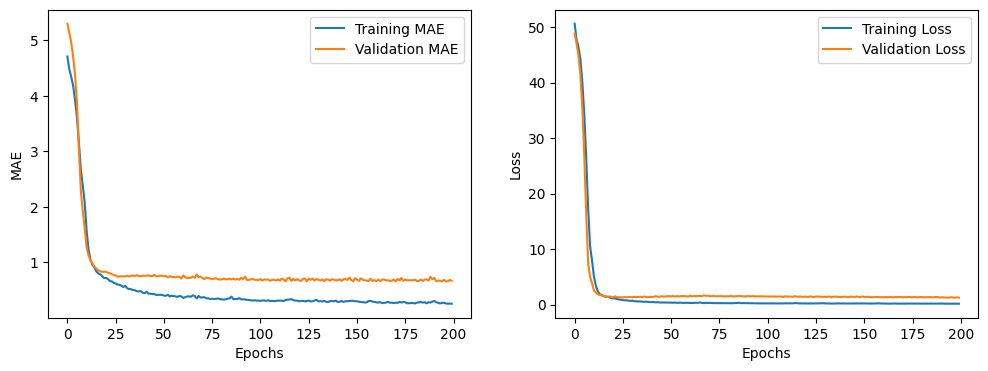

In [18]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


Testing the model

In [19]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5956 - mae: 0.4884 
Test Loss: 0.5798402428627014, Test MAE: 0.49959519505500793


Predicting with the model

In [20]:
pred = model.predict(X_test)

predictions = pd.DataFrame({"Actual Price": y_test.values, "Predicted Price": pred.flatten()})
print(predictions.head())

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
   Actual Price  Predicted Price
0          0.35         0.289163
1         10.11        10.586251
2          4.95         5.341197
3          0.15         0.078569
4          6.95         7.405352


In [21]:
predictions

,Actual Price,Predicted Price
0,0.35,0.289163
1,10.11,10.586251
2,4.95,5.341197
3,0.15,0.078569
4,6.95,7.405352
...,...,...
56,5.50,4.908448
57,9.50,10.298848
58,2.10,2.157015
59,7.40,6.839894


The model shows solid predictive performance, with most estimated prices closely matching the actual values.

For higher-priced cars (e.g., 10.11 vs. 10.59), the differences are small, suggesting strong accuracy in that range.

While the relative error is slightly higher for lower-priced cars (e.g., 0.15 vs. 0.078), the model still captures the overall trend well.

There are some minor overestimations and underestimations (e.g., 6.95 vs. 7.40 or 7.40 vs. 6.83), but these stay within a reasonable margin.

Overall, the model handles mid-range prices particularly well, and there are no clear signs of overfitting.